# IMPORT ALL LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT THE DATASET

In [2]:
ecommData = pd.read_csv("all_data.csv")
ecommData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# NOTING AND ELIMINATING THE NaN DATA

In [3]:
ecommData.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
ecommData.dropna(how="all", inplace = True)

In [5]:
ecommData.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

# CREATING A COLUMN WITH THE MONTH NUMBER

In [6]:
def GetMonth(FullDate):
    return FullDate.split("/")[0]

In [7]:
ecommData["month"] =  ecommData["Order Date"].apply(GetMonth)
ecommData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


## ELIMINATING ONE VALUE DUE TO STRING VALUE IMPOSIBLE TO CONVERT INTO INT

In [8]:
ecommData["month"].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [9]:
Stringfilter=ecommData["month"] == "Order Date"
ecommData = ecommData[~Stringfilter]

# CONVERTING STRING TYPE INTO INT/FLOAT DATA

In [ ]:
ecommData["month"] = ecommData["month"].astype(int)
ecommData["Quantity Ordered"] = ecommData["Quantity Ordered"].astype(int)
ecommData["Price Each"] = ecommData["Price Each"].astype(float)
ecommData.dtypes

# CREATING A COLUMN WITH THE TOTAL SALES

In [11]:
ecommData["Total Sales"] =  ecommData["Quantity Ordered"] * ecommData["Price Each"]
ecommData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


# TOTAL SALES BY MONTH

In [12]:
ecommData.groupby("month")["Total Sales"].sum()

month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

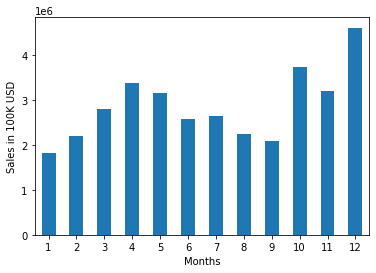

In [13]:
ecommData.groupby("month")["Total Sales"].sum().plot(kind="bar")
plt.xlabel("Months")
plt.ylabel("Sales in 100K USD")
plt.xticks(rotation="horizontal")
plt.show()

# GETTING THE CITY IN A NEW COLUMN

In [14]:
def GetCity(address):
    return address.split(",")[1]
    

In [15]:
ecommData["City"] = ecommData["Purchase Address"].apply(GetCity)

In [19]:
ecommData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


<AxesSubplot:xlabel='City'>

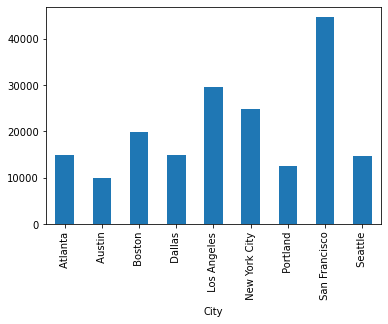

In [17]:
ecommData.groupby("City")["City"].count().plot.bar()

# CREATING A HOUR COLUMN

In [20]:
ecommData["Hour"] = pd.to_datetime(ecommData["Order Date"]).dt.hour

In [23]:
keys=[]
hours=[]

for key, hour in ecommData.groupby("Hour"):
    keys.append(key)
    hours.append(len(hour))

In [24]:
print(keys)
print(hours)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[3910, 2350, 1243, 831, 854, 1321, 2482, 4011, 6256, 8748, 10944, 12411, 12587, 12129, 10984, 10175, 10384, 10899, 12280, 12905, 12228, 10921, 8822, 6275]


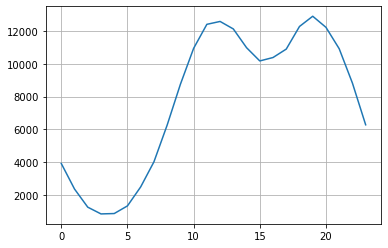

In [27]:
plt.grid()
plt.plot(keys, hours)
plt.show()

# SUM OF ALL PRODUCTS BY PRODUCTS NAME

<AxesSubplot:xlabel='Product'>

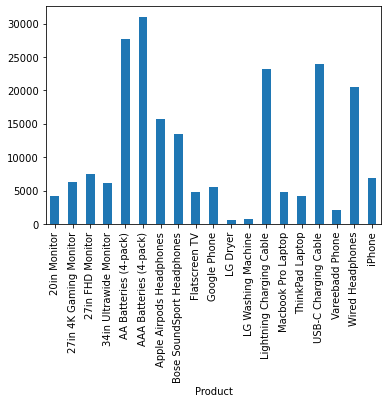

In [30]:
ecommData.groupby("Product")["Quantity Ordered"].sum().plot.bar()

# MEAN OF THE PRICE OF EVERY PRODUCT

In [33]:
ecommData.groupby("Product")["Price Each"].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

## VIZ TO NOTICE THE QUANTITY OF PRODUCTS SOLD VS THE PRODUCT COST

In [34]:
productsSold=  ecommData.groupby("Product")["Quantity Ordered"].sum().index
quantitySold=  ecommData.groupby("Product")["Quantity Ordered"].sum()
prices =  ecommData.groupby("Product")["Price Each"].mean()

C:\Users\ulise\AppData\Local\Temp/ipykernel_48076/160448506.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(productsSold, rotation = "vertical", size=8)


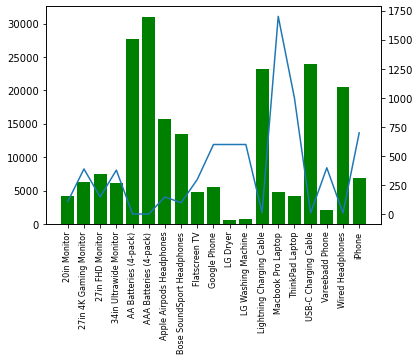

In [38]:
fig, ax1 = plt.subplots()
ax2=ax1.twinx()

ax1.bar(productsSold, quantitySold, color = "g")
ax2.plot(productsSold, prices)
ax1.set_xticklabels(productsSold, rotation = "vertical", size=8)
plt.show()

## GETTING THE DUPLICATE ORDERS TO NOTICE THE PRODUCTS SOLD TOGETHER

In [42]:
duplicate = ecommData["Order ID"].duplicated(keep=False)
duplicateEccomData = ecommData[duplicate]
duplicateEccomData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11


In [48]:
duplicateEccomData["Products sold Together"]= duplicateEccomData.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

C:\Users\ulise\AppData\Local\Temp/ipykernel_48076/2404722107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicateEccomData["Products sold Together"]= duplicateEccomData.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


In [49]:
duplicateEccomData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Products sold Together
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [50]:
duplicateEccomData.drop_duplicates(subset=["Order ID"])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Total Sales,City,Hour,Products sold Together
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,17,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City,11,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...,...,...,...,...,...,...,...,...,...
186781,259296,Apple Airpods Headphones,1,150.00,09/28/19 16:48,"894 6th St, Dallas, TX 75001",9,150.00,Dallas,16,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,iPhone,1,700.00,09/15/19 18:54,"138 Main St, Boston, MA 02215",9,700.00,Boston,18,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,34in Ultrawide Monitor,1,379.99,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",9,379.99,Atlanta,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta,0,"Wired Headphones,AAA Batteries (4-pack)"


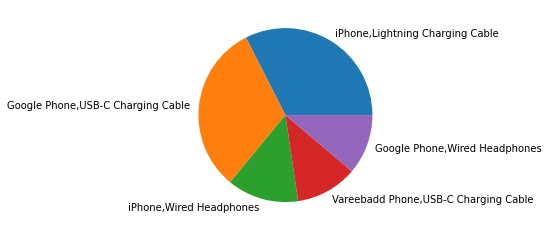

In [53]:
duplicateEccomData["Products sold Together"].value_counts()[0:5].plot.pie()
plt.ylabel("")
plt.show()